In [1]:
# hide
#export with 
#jupyter nbconvert Exam_2022.ipynb --to pdf --RegexRemovePreprocessor.patterns="['# hide']" --no-input --output exam2016.pdf

In [147]:
#hide
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as sns                                  
import sys      
from distfit import distfit
import pandas as pd
from sympy import * 
plt.rcParams.update({'font.size': 18})

In [7]:
#hide
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure
np.random.seed(67)

In [149]:
#hide
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    
# def myDiff(formula):
#     return sqrt((formula.diff(L) * dL)**2 + (formula.diff(W) * dW)**2)

# def myDiffWithCorr(formula, name = "", printNow = False):
#     dd = sqrt((formula.diff(L) * dL)**2 + (formula.diff(W) * dW)**2 + 2*(formula.diff(L)*formula.diff(W)*(sigCorr**2)))
#     if(printNow):
#         lprint(latex(Eq(symbols('sigma_'+name), dd)))
#     fd = lambdify((L,dL,W,dW,sigCorr),dd)
#     return dd, fd
    
# def diff_and_print(formula, name = ""):
#     # Calculate uncertainty and print original relation/formula and the uncertainty
#     dd = myDiff(formula)
#     lprint(latex(Eq(symbols(name),formula)))
#     lprint(latex(Eq(symbols('sigma_'+name), dd)))
    
# def lambdifyFormula(formula, *args, name = ""):
#     # Turn expression into numerical functions 
#     f = lambdify((L,W),formula)
#     d = myDiff(formula)
#     fd = lambdify((L,dL,W,dW),d)
#     return f, fd

#  I - Distributions and probabilities

## 1.1 Your friend tells you, that a bag contains 3 white, 5 black, and 7 grey marbles

### 1.1.1 If you take two random marbles without putting them back, what is the probability that at least one of them is white?

The distribution folloed by this problem is the **Hypergeometric distribution** which has a characteristics that, is a discrete probability distribution, describing the probability of $k = \frac{3}{15}$ successes, in n = 2 draws, without replacement, from a finite population of size N = 15 that contains exactly K = 3
white balls.

In [4]:
#hide 
#balls
white = 3
black = 5
gray = 7 
total  = white + black + gray
white_porb  = white/total


col_0       0      1     2
row_0                     
counts  62948  34160  2892


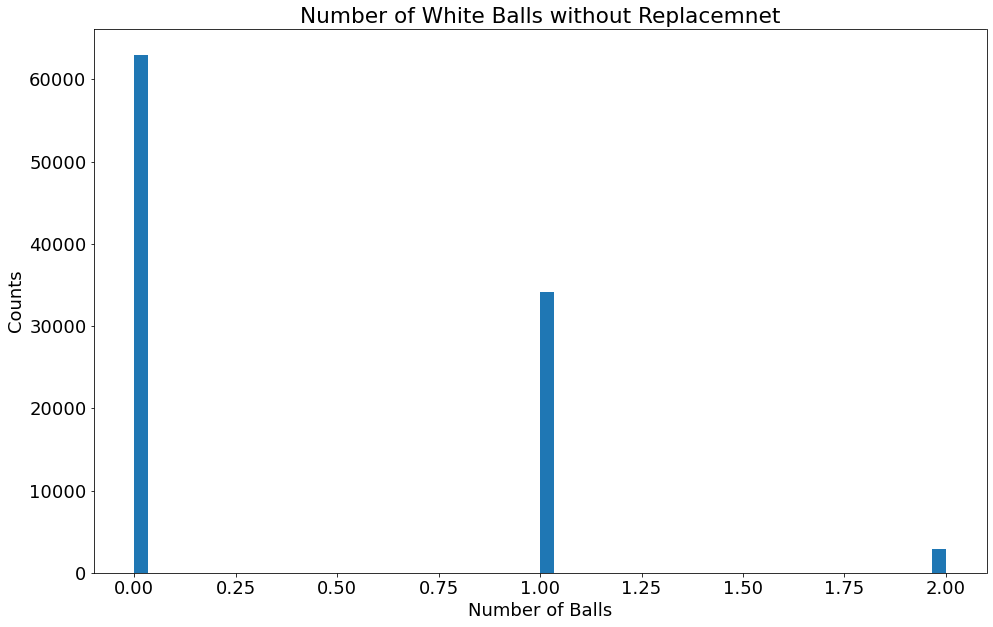

In [32]:
#hide 
#by simulation 
N= 100000
hypergeom_balls =stats.hypergeom.rvs(total, white, 2, size=N)

print( pd.crosstab(index="counts", columns= hypergeom_balls))

fig, ax = plt.subplots(figsize=(16, 10)) 
plt.hist(hypergeom_balls,bins =60)
ax.set_xlabel('Number of Balls')
ax.set_ylabel('Counts')
ax.set_title('Number of White Balls without Replacemnet')

plt.show()


The error on the Simulation can be obtained from the central limit theorem, by getting a distribution of the means and getting the standard deviation.

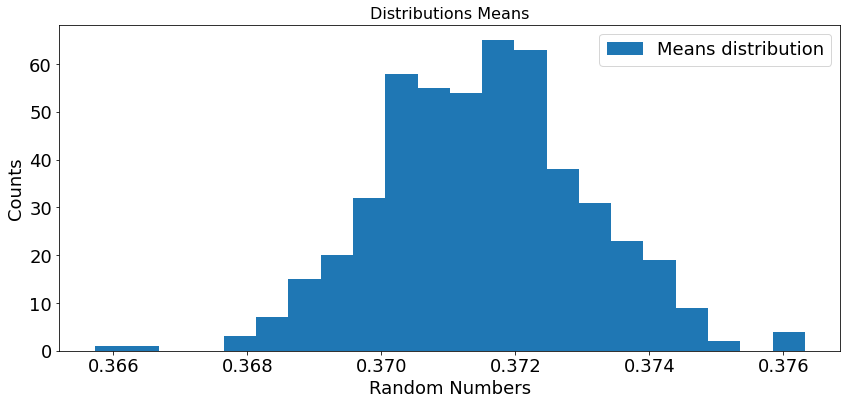

In [39]:
#hide
#example
num_events_bin = 2    # Number of flips per trial
prob_bin = white_porb          # Success probability
trails_bin = 10000      # Number of trials


def rand_hyper():
    hypergeom_balls =stats.hypergeom.rvs(total, white, 2, size=N)
    return len(hypergeom_balls[hypergeom_balls>=1])/N


def sim_std(sims, func):
    #store the data 
    sim_mean = np.zeros(sims)
    
    #iterate over function get the mean and std on each iteration
    for i in range (sims):
        sim_mean[i] = np.mean(func())
        
    fig, ax = plt.subplots(figsize=(14,6))
    ax.hist(sim_mean,bins =int(np.sqrt(sims)), label = 'Means distribution')
    ax.set(xlabel='Random Numbers',ylabel='Counts')
    ax.set_title('Distributions Means',fontsize = 16)
    ax.legend()
    plt.show()
    return np.mean(sim_mean), np.std(sim_mean)
sim_mean, sim_mean_std = sim_std(500, rand_hyper )


In [44]:
#hide
print(f"""The probability of getting one or more white balls using simulations is:
({sim_mean*100:.1f}+/-{sim_mean_std*100:.1f})%""")

The probability of getting one or more white balls using simulations is:
(37.2+/-0.2)%


In [48]:
#hide
print(f"""The probability of getting one or more white balls using pmf is:
{np.sum(stats.hypergeom.pmf([1,2], total, white, 2))*100:.1f}%""")


The probability of getting one or more white balls is:
37.1%


### If you pick a marble, record its color, and then put it back 25 times independently, what is the probability of getting exactly 18 grey marbles? At least 18 grey marbles?

The distribution of picking gray balls with replacement from the total 15 balls follow is binomial.

col_0   3   4   5    6    7    8    9     10    11    12    13    14   15  \
row_0                                                                       
counts   2  13  53  126  272  532  878  1252  1575  1616  1341  1034  680   

col_0    16   17  18  19  20  21  
row_0                             
counts  355  172  66  28   4   1  


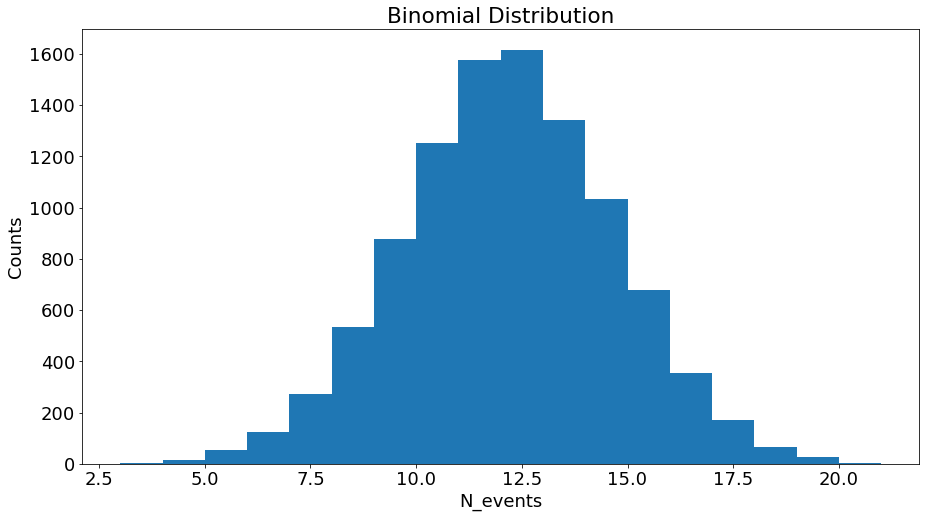

In [51]:
#hide
#random binomial example; fliping a coin 10 times how many heads after 10000 trials 
num_events_bin = 25    # Number of flips per trial
prob_bin = gray/total          # Success probability
trails_bin = 10000      # Number of trials


rand_binom = stats.binom.rvs(n=num_events_bin,p=prob_bin,size=trails_bin)  

print( pd.crosstab(index="counts", columns= rand_binom))

fig, ax = plt.subplots(figsize = (15,8))
ax.hist(rand_binom,bins=max(rand_binom)-3)
ax.set(xlabel = 'N_events', ylabel = 'Counts', title='Binomial Distribution')
plt.show()

Similarly as in 1.1.1 the probabilities using random numbers follow the central limit theorem therefore the probability and its error is obtained using this method. 

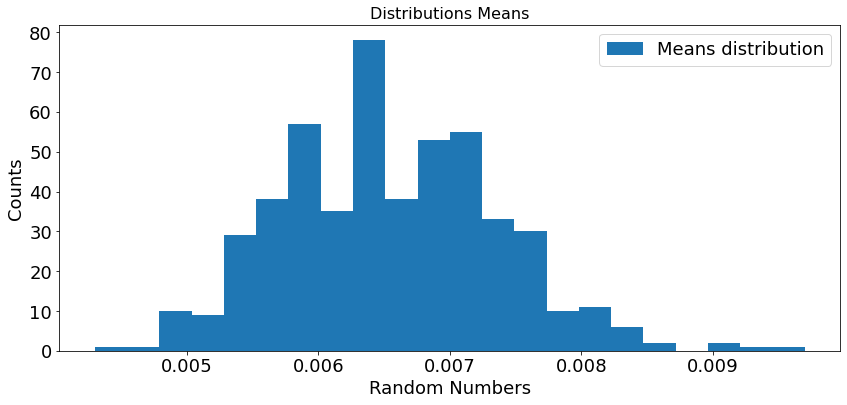

In [57]:
#hide
def rand_binom():
    rand_binom =stats.binom.rvs(n=num_events_bin,p=prob_bin,size=trails_bin)  
    return len(rand_binom[rand_binom==18])/ trails_bin


sim_mean, sim_mean_std = sim_std(500, rand_binom )


In [60]:
#hide
print(f"""The probability of getting exactly 18 gray balls in 25 trials using simulations is:
({sim_mean*100:.2f}+/-{sim_mean_std*100:.2f})%""")

The probability of getting exactly 18 gray balls in 25 trials using simulations is:
(0.66+/-0.08)%


In [61]:
#hide
print(f"""The probability of getting exactly 18 gray balls in 25 trials using pmf is:
{(stats.binom.pmf(k=18,n=num_events_bin,p=prob_bin))*100:.2f}%""")

The probability of getting exactly 18 gray balls in 25 trials using pmf is:
0.65%


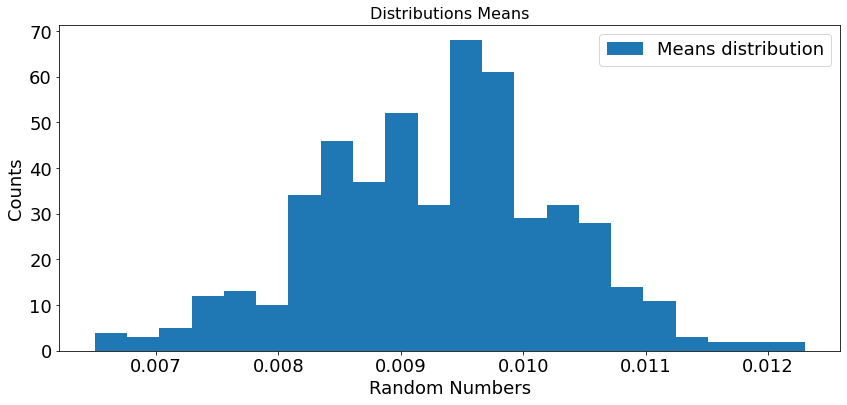

In [63]:
#hide
def rand_binom_more():
    rand_binom =stats.binom.rvs(n=num_events_bin,p=prob_bin,size=trails_bin)  
    return len(rand_binom[rand_binom>=18])/ trails_bin


sim_mean, sim_mean_std = sim_std(500, rand_binom_more )


In [68]:
#hide
print(f"""The probability of getting  18 gray balls  or moremin 25 trials using simulations is:
({sim_mean*100:.2f}+/-{sim_mean_std*100:.2f})%""")

The probability of getting  18 gray balls  or moremin 25 trials using simulations is:
(0.93+/-0.10)%


In [69]:
#hide
print(f"""The probability of getting exactly 18 gray balls in 25 trials using pmf is:
{(np.sum(stats.binom.pmf(k=np.arange(18,num_events_bin+1),n=num_events_bin,p=prob_bin)))*100:.2f}%""")

The probability of getting exactly 18 gray balls in 25 trials using pmf is:
0.93%


### If you got 18 grey marbles out of 25 picks, would you trust your friend’s information?

No I would not trust the information as the probability is really small, MAYBE USE TRIAL FACTOR

## 1.2The lifetime L of a certain component is exponentially distributed: L(t) = 1/τ exp(−t/τ ).
### 1.2. If there is a 4% chance of this component lasting more than 500 hours, what is the value of τ?

In [74]:
stats.expon.cdf


8.164398904051026e-05

## 1.3 A radio telescope detects 241089 signals/day, based on a 9 week observation campaign.

### 1.3.1 One hour, they receive 9487 signals. What is the chance of observing exactly this number

In [84]:
def frac_error(a,b):
    """params:
       a: number 1
       b: number 2
       return: fraction with its error"""
    frac = a/b
    frac_error = np.sqrt((frac * (1-frac)) / b)
    return frac,frac_error



In [102]:
signals_hour = 241089/24
error_signals_hour = frac_error(241089,24)
received_events = 9487
received_events/signals_hour

0.9444147182160945

In [96]:
mu_poiss = signals_hour       
poiss_pmf = stats.poisson.pmf(k=received_events,mu=mu_poiss)
print(f"""The probability of getting exactly {received_events} is:
{poiss_pmf*100:.8f}% this is to small as number is to exact""")

The probability of getting exactly 9487 is:
0.00000006% this is to small as number is to exact


### Is this observation extraordinary, based on an estimate of its general probability?

In [97]:
def trial_factor(prob,trials):
    return 1-(1-prob)**trials

In [98]:
signals_hour
nine_week_hour = 9*7*24 #weeks to days 

1512

In [104]:

print(f"""The trial factor probability  is:
{trial_factor(poiss_pmf,nine_week_hour)*100:5f}%
indicating that this observation it is extraordinary""")

The trial factor probability  is:
0.000084%
indicating that this observation it is extraordinary


## 1.4  Shooting with a bow, you have 3% chance of hitting a certain target

### 1.4.1 What distribution is the number of hits going to follow, given N shots?

The **Geometric Distributions** as it  models the time it takes for an event to occur. The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success.


### 1.4.2 What is the probability that the first hit will come after 20 shots?

This can be calculated by simulation or using pmf

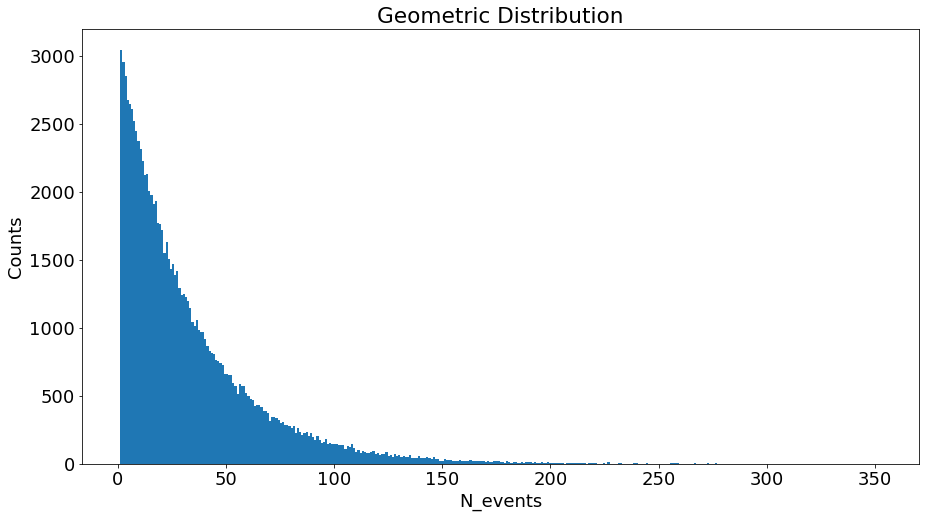

0.0172

In [119]:
#hide

trials_geom = 100000
prob_geom = 0.03
rand_geom = stats.geom.rvs(size=trials_geom,p=prob_geom)       

# Print table of counts
#print( pd.crosstab(index="counts", columns= rand_geom))


fig, ax = plt.subplots(figsize = (15,8))
ax.hist(rand_geom,bins=max(rand_geom))
ax.set(xlabel = 'N_events', ylabel = 'Counts', title='Geometric Distribution')
plt.show()


The error on the probability and the mean probability is calulted using the central limit theorem

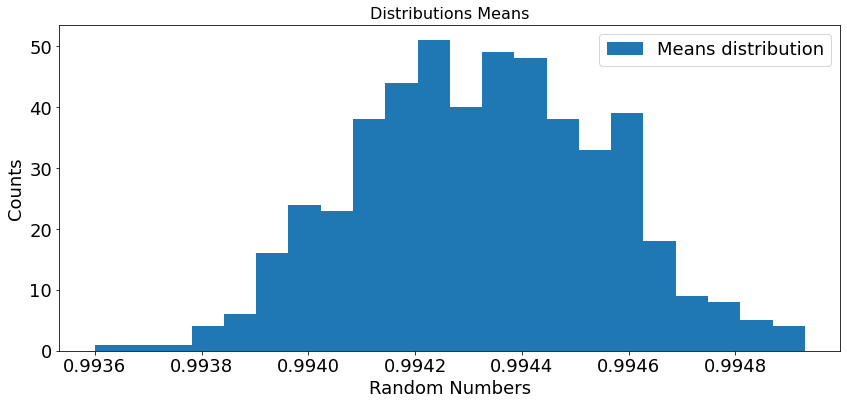

In [135]:
def rand_geom():
    rand_geom = stats.geom.rvs(size=trials_geom,p=prob_geom)   
    return len(rand_geom[rand_geom>20])/ trials_geom

sim_mean, sim_mean_std = sim_std(500, rand_geom )


In [136]:
#hide
print(f"""The probability that the first hit comes after 20 shoots using simulations is:
({sim_mean*100:.2f}+/-{sim_mean_std*100:.2f})%""")

The probability that the first hit comes after 20 shoots using simulations is:
(99.43+/-0.02)%


In [122]:
#hide
print(f"""The probability that the first hit comes after 20 shoots using cdf is:
{stats.geom.pmf(k=20,p=0.03)*100:.2f}%""")


The probability that the first hit comes after 20 shoots using pmf is:
1.68%


### 1.4.3 What is the probability that it will take more than 4000 shots to hit the target 100 times?
The probability of getting 100 hits is .03%.

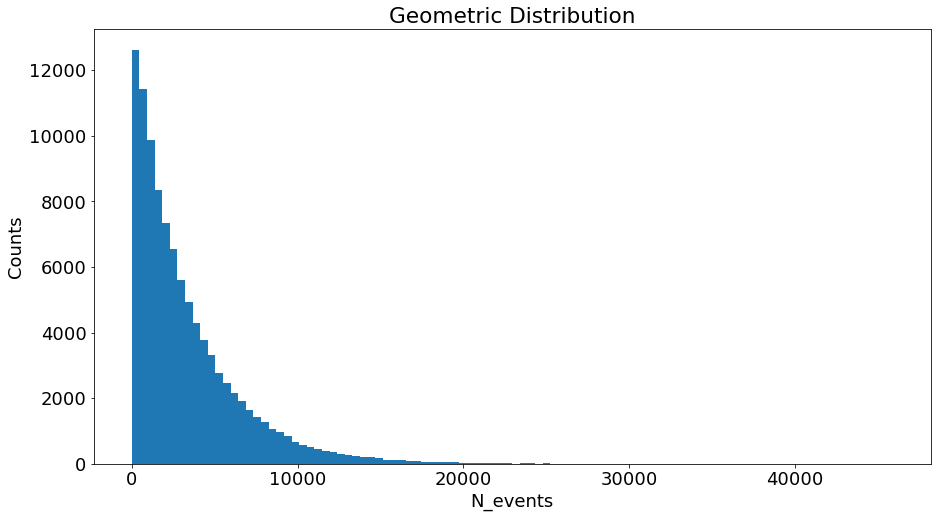

In [139]:
#hide
trials_geom = 100000
prob_geom = 0.0003
rand_geom = stats.geom.rvs(size=trials_geom,p=prob_geom)       

# Print table of counts
#print( pd.crosstab(index="counts", columns= rand_geom))


fig, ax = plt.subplots(figsize = (15,8))
ax.hist(rand_geom,bins=100)
ax.set(xlabel = 'N_events', ylabel = 'Counts', title='Geometric Distribution')
plt.show()

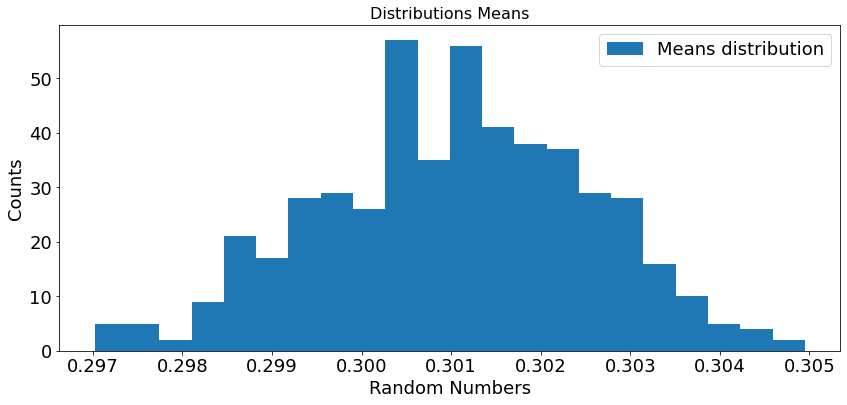

In [141]:
def rand_geom2():
    rand_geom = stats.geom.rvs(size=trials_geom,p=prob_geom)   
    return len(rand_geom[rand_geom>4000])/ trials_geom

sim_mean, sim_mean_std = sim_std(500, rand_geom2 )


In [143]:
#hide
print(f"""The probability that the first 100 hits comes after 4000 shoots using simulations is:
({sim_mean*100:.2f}+/-{sim_mean_std*100:.2f})%""")

The probability that the first 100 hits comes after 4000 shoots using simulations is:
(30.10+/-0.15)%


In [142]:
#hide
print(f"""The probability that the first 100 hits comes after 4000 shoots using cdf is:
{( 1- stats.geom.cdf(4000, prob_geom, loc=0))*100:.2f}%""")


The probability that the first 100 hits comes after 4000 shoots using cdf is:
30.11%


# 2 Error propagation

## 2.1 Let $x = 1.92 ± 0.39$ and $y = 3.1 ± 1.3$, and let $z1 = y/x$, and $z2 = cos(x) · x/y$. 

### 2.1.1 What are the uncertainties of $z1$ and $z2$, if $x$ and $y$ are uncorrelated

In [173]:
# Define variables:
z1,z2,x,y = symbols("z_1, z_2, x, y")
dz1,dz2,dx,dy = symbols("sigma_z_1, sigma_z_2, sigma_x, sigma_y")

# Define functions:

z1 = y/x
z2 = cos(x)*(x/y)
#print using sympy
lprint(latex(Eq(symbols('z_1'),z1)))
lprint(latex(Eq(symbols('z_2'),z2)))

#calculate uncertanties
dz1 = sqrt((z1.diff(x)*dx)**2 + (z1.diff(y)*dy)**2)
lprint(latex(Eq(symbols('sigma_z_1'),dz1)))
dz2 = sqrt((z2.diff(x)*dx)**2 + (z2.diff(y)*dy)**2)
lprint(latex(Eq(symbols('sigma_z_2'),dz2)))




#make them functions 
fz1 = lambdify((x,y),z1)
fdz1 = lambdify((x,dx,y,dy),dz1)
fz2 = lambdify((x,y),z2)
fdz2 = lambdify((x,dx,y,dy),dz2)



#assign values to variables 

vx,vdx,vy, vdy = 1.92, 0.39, 3.1, 1.3

#solve 
vz1 = fz1(vx,vy)
vdz1 = abs(fdz1(vx,vdx,vy,vdy))

vz2 = fz2(vx,vy)
vdz2 = abs(fdz2(vx,vdx,vy,vdy))
lprint(fr'z1 = ({vz1:.3f} \pm {vdz1:.3f})')
lprint(fr'z2 = ({vz2:.2f} \pm {vdz2:.2f})')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

By simulation assumig that errors are gaussian as not stated otherwise 

In [167]:
x = 1.92
std_x = 0.39
y = 3.1
std_y = 1.3
num = 100000  #amount of random numbers 

#generate random numbers 
random_gaussian_x = stats.norm.rvs(loc=x, scale=std_x,size=num) 
random_gaussian_y= stats.norm.rvs(loc=y, scale=std_y,size=num) 

In [168]:
z1 = random_gaussian_y/random_gaussian_x
z2 = random_gaussian_x*np.cos(random_gaussian_x)/random_gaussian_y
print(f"""z1=({z1.mean()}+\-{z1.std()})
z2 = ({z2.mean()}+\-{z2.std()} """)

z1=(1.6882898511151068+\-0.8371371175773518)
z2 = (-0.2948434093792656+\-28.94079393279059 


### 2.1.2 If x and y were highly correlated (ρxy = 0.9), what would be the uncertainty on z1?

In [176]:
# Define variables:
z1,x,y = symbols("z_1, x, y")
dz1,dx,dy, sigCorr = symbols("sigma_z_1, sigma_x, sigma_y, C")

# Define functions:

z1 = y/x

#print using sympy
lprint(latex(Eq(symbols('z_1'),z1)))


dz1 = sqrt((z1.diff(x) * dx)**2 + (z1.diff(y) * dy)**2 + 2*(-z1.diff(x)*z1.diff(y)*(sigCorr**2)))
    

#calculate uncertanties

lprint(latex(Eq(symbols('sigma_z_1'),dz1)))



#make them functions 
fz1 = lambdify((x,y),z1)

fdz1 = lambdify((x,dx,y,dy, sigCorr),dz1)



#assign values to variables 

vx,vdx,vy, vdy, vsigCorr = 1.92, 0.39, 3.1, 1.3, 0.9

#solve 
vz1 = fz1(vx,vy)
vdz1 = abs(fdz1(vx,vdx,vy,vdy, vsigCorr))


lprint(fr'z1 = ({vz1:.3f} \pm {vdz1:.3})')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Which of the (uncorrelated) variables x and y contributes most to the uncertainty on z2?

In [184]:
# Define variables:
z2,x,y = symbols(" z_2, x, y")
dz2x,dz2y,dx,dy = symbols(" sigma_z_2x,sigma_z_2y, sigma_x, sigma_y")

# Define functions:


z2 = cos(x)*(x/y)
#print using sympy

lprint(latex(Eq(symbols('z_2'),z2)))

#calculate uncertanties
dz2x = (z2.diff(x)*dx)
lprint(latex(Eq(symbols('sigma_z_2x'),dz2x)))
dz2y = z2.diff(y)*dy
lprint(latex(Eq(symbols('sigma_z_2y'),dz2y)))




#make them functions 


fz2 = lambdify((x,y),z2)
fdz2x = lambdify((x,dx,y,dy),dz2x)
fdz2y = lambdify((x,dx,y,dy),dz2y)


#assign values to variables 

vx,vdx,vy, vdy = 1.92, 0.39, 3.1, 1.3

#solve 
vz2 = fz2(vx,vy)
vdz2x = abs(fdz2x(vx,vdx,vy,vdy))
vdz2y = abs(fdz2y(vx,vdx,vy,vdy))
lprint(fr'dz2_x = ({vdz2x:.3f})')
lprint(fr'dz2_y = ({vdz2y:.2f})')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The error due to $x$ is $\sigma x= 0.27$ beign the one that contribute more to the uncertanty on $z2$

## 2.2 Five patients were given a drug to test if they slept longer (in hours). Their results were: +3.7, −1.2, −0.2, +0.7, +0.8. A Placebo group got the results: +1.5, −1.0, −0.7, +0.5, +0.1.

### 2.2.1 Estimate the mean, standard deviation, and the uncertainty on the mean for drug group

In [201]:
drug  = np.array([3.7,-1.2,-0.2,0.7,0.8])
placebo = np.array([1.5,-1.,-.7,.5,.1])
placebo_mean = placebo.mean()
drug_mean = drug.mean()
drug_std = drug.std()
placebo_std = placebo.std()
drug_mean_u =drug_std/np.sqrt(len(drug)-1)

In [195]:
print(f"""The mean is:
{drug_mean},
The standard deviation is:
{drug_std}
the uncertanty on the mean is :
{drug_mean_u}""")

The mean is:
0.76,
The standard deviation is:
1.6378034070058594
the uncertanty on the mean is :
0.8189017035029297


### 2.2.2 What is the probability that the drug group slept longer than the placebo group?

$H_0$: The drug is efective.
$H_1$: the drug is not efective.

In [218]:
def two_sample_z(x1,x2):
    return (x1.mean()-x2.mean())/(np.sqrt(x1.std()**2+x2.std()**2))
Z = two_sample_z(drug,placebo)

In [221]:
p_values =(1-(stats.norm.cdf(Z))) 
print(f"""The probability that the drug goup slept longer is:
{p_values*100:.1f}%""")

The probability that the drug goup slept longer is:
35.8%


#  3 Simulation / Monte Carlo

##  3.1 Assume $f(x) = Cx^a sin(πx)$ for $x \in [0, 1]$ and $a = 3$ is a theoretical distribution.

### 3.1.1 By what method(s) would you generate random numbers according to f(x)

It is possible to generate random numbers using both the **Transformation method**, as the function is bounded in the choosen range, and the **Accept-Reject**.
It is better to use the Transformation method as it is more eficcient than the accept reject.

### 3.1.2 Determine (possibly numerically) the value of C for f(x) to be normalised.

In [263]:
a=3
def func(x,a):
    return x**a*np.sin(np.pi*x)

x = np.linspace(0,1,10000)
ymax = max(func(x,a))


In [274]:
#using accept reject 
def accept_reject_PDF(func,a,xmin,xmax,ymax,res) :
    """params: 
       func: function to simulate 
       args: function arguments
       xmin: lower limit of function
       xmax:upper limit of function 
       ymax: maximum y value
       res: resolution
       return: randomly distributed numbers acording to function
    """
    
    N_MC = res
    x = np.linspace(xmin,xmax,N_MC)
    
    #t = np.random.uniform(xmin,xmax,N_MC)  # get uniform temporary x values
    y = np.random.uniform(xmin,ymax, N_MC) # get uniform random y values
    # accepted indeces
    idx = y <=  func(x,a)
    accept = y[idx]
    x_axis = x[idx]
    
    accept_prob = x[idx].size / x.size
    return accept,x_axis, accept_prob

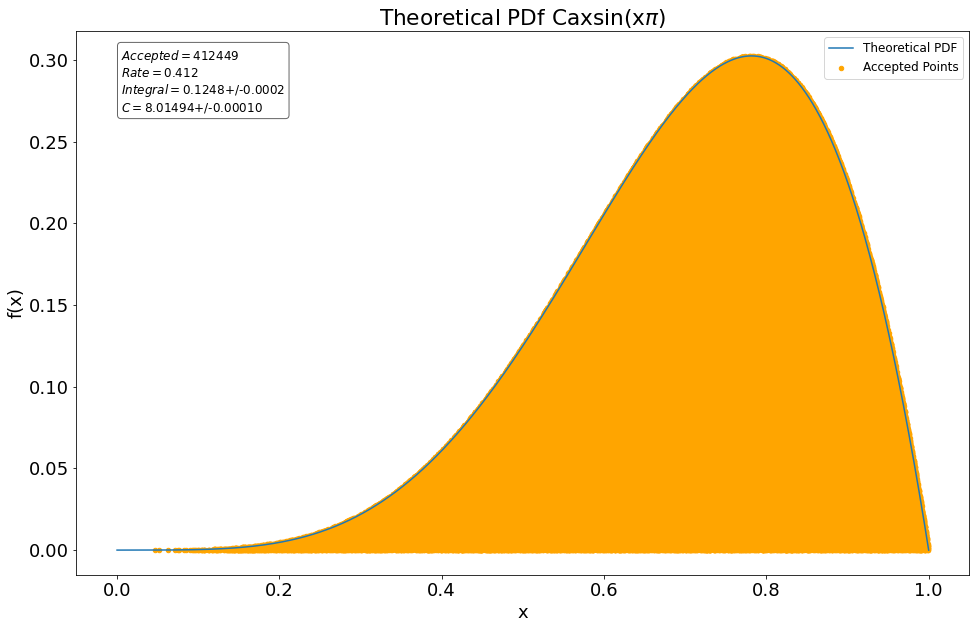

In [275]:
xmin=0
xmax=1

N_points = 100000
aprox, xscatter,rate = accept_reject_PDF(func,a,xmin,xmax,ymax,N_points)
eff = rate            # Efficiency of generating points (fraction accepted)
eff_error = np.sqrt(eff * (1-eff) / len(aprox))    # Error on efficiency (binomial)
integral =  eff * (xmax-xmin) * ymax               # Integral
integral_error = eff_error * (xmax-xmin) * ymax    # Error on integral
C = 1/integral
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(x,func(x,a),label='Theoretical PDF')
ax.scatter(xscatter,aprox,s=20,label='Accepted Points',color='orange')

ax.set_title('Theoretical PDf Caxsin(x$\pi$)')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.legend()
#text
textstr = '\n'.join((
    r'$Accepted=%.0f$' %(len(aprox),),
    r'$Rate=%.3f$' % (rate, ),
    r'$Integral=%.4f$+/-$%.4f$' % (integral,integral_error,),
    r'$C=%.5f$+/-$%.5f$' %(C,eff_error/C,),
    ))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.6)

# place a text box in upper left in axes coords
ax.text(0.05, 0.97, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
#fig.tight_layout()
ax.legend(fontsize=12)

plt.show()

The constant $C$ obtained numerically is ${C=(8.0149\pm 0.0001)}$<br> The value of $C$ can be obtained analitically solving the integral as shown bellow:

obtaining confirmation of the above result $C=8 $

### 3.1.3 Fit a histogram with values from f(x) and determine how many measurements (i.e. values of x) you need in an experiment to determine the value of a with 1% precision.

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 3.5433160] [loc=0.706 scale=0.159]
[distfit] >[expon     ] [0.00 sec] [RSS: 71.8046436] [loc=0.046 scale=0.660]
[distfit] >[pareto    ] [40.6 sec] [RSS: 70.3672054] [loc=-20966533.244 scale=20966533.290]
[distfit] >[dweibull  ] [15.7 sec] [RSS: 4.6266657] [loc=0.709 scale=0.140]
[distfit] >[t         ] [19.4 sec] [RSS: 3.5442884] [loc=0.706 scale=0.159]
[distfit] >[genextreme] [11.7 sec] [RSS: 0.1518506] [loc=0.669 scale=0.172]
[distfit] >[gamma     ] [18.1 sec] [RSS: 4.5823946] [loc=-1.228 scale=0.014]
[distfit] >[lognorm   ] [35.3 sec] [RSS: 3.7226598] [loc=-40.806 scale=41.511]
[distfit] >[beta      ] [15.1 sec] [RSS: 0.0061799] [loc=0.022 scale=0.979]
[distfit] >[uniform   ] [0.00 sec] [RSS: 39.5309347] [loc=0.046 scale=0.953]
[distfit] >[loggamma  ] [4.13 sec] [RSS: 1.3628253] [loc=0.693 scale=0.172]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


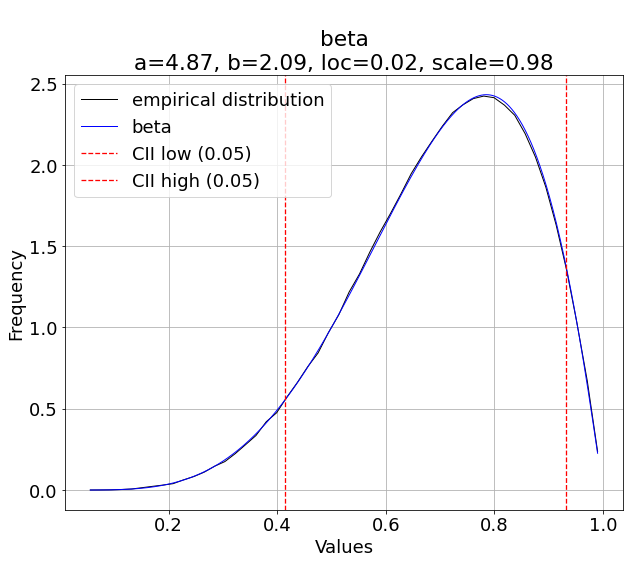

In [284]:
def find_dis(dis):
    # Initialize distfit
    dist = distfit()
    # Determine best-fitting probability distribution for data
    dist.fit_transform(dis)
    dist.plot()
find_dis(xscatter)

In [291]:
def func(C,x,a):
    return C*x**a*np.sin(np.pi*x)

x = np.linspace(0,1,10000)
ymax  = max(func(C,x,a))

In [292]:
#using accept reject 
def accept_reject_PDF(func,C,a,xmin,xmax,ymax,res) :
    """params: 
       func: function to simulate 
       args: function arguments
       xmin: lower limit of function
       xmax:upper limit of function 
       ymax: maximum y value
       res: resolution
       return: randomly distributed numbers acording to function
    """
    
    N_MC = res
    x = np.linspace(xmin,xmax,N_MC)
    
    #t = np.random.uniform(xmin,xmax,N_MC)  # get uniform temporary x values
    y = np.random.uniform(xmin,ymax, N_MC) # get uniform random y values
    # accepted indeces
    idx = y <=  func(C,x,a)
    accept = y[idx]
    x_axis = x[idx]
    
    accept_prob = x[idx].size / x.size
    return accept,x_axis, accept_prob

In [293]:
aprox, xscatter,rate = accept_reject_PDF(func,C,a,xmin,xmax,ymax,N_points)

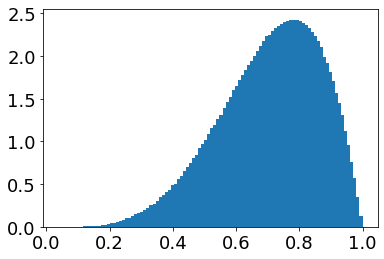

In [297]:
plt.hist(xscatter,bins =100,density =True)
plt.show()